In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm

import cv2

In [2]:
videos_path = '/kaggle/input/wlasl-processed/videos'
nslt100_path = '/kaggle/input/wlasl-processed/nslt_100.json'
classes_path = '/kaggle/input/wlasl-processed/wlasl_class_list.txt'
wlasl = '/kaggle/input/wlasl-processed/WLASL_v0.3.json'

In [3]:
video_names = os.listdir(videos_path)
video_ids = [i[:-4] for i in video_names]
video_ids[:10]

['03238',
 '19110',
 '24027',
 '65091',
 '08595',
 '56178',
 '57934',
 '32478',
 '54425',
 '42670']

In [4]:
with open(classes_path, 'r') as f:
    text = f.read()
# print(text)
text = [i[2:] for i in text.splitlines()]
for i in range(len(text)):
    if '\t' in text[i]:
        temp = text[i].split()
        if (isinstance(temp, str) is False):
            if len(temp) ==0:
                text[i] = temp[0]
            else:
                text[i] = temp[-1]
            
#         text[i] = text[i][1:]
text[:10]

['book',
 'drink',
 'computer',
 'before',
 'chair',
 'go',
 'clothes',
 'who',
 'candy',
 'cousin']

In [5]:
with open(nslt100_path, 'r') as f:
    nslt = json.load(f)
nslt = pd.DataFrame(nslt).transpose()
nslt.head()

,subset,action
05237,train,"[77, 1, 55]"
69422,val,"[27, 1, 51]"
10899,train,"[82, 1, 48]"
10898,val,"[82, 1, 39]"
10893,train,"[82, 1, 50]"


In [6]:
with open(wlasl, 'r') as f:
    wlasl = json.load(f)
# wlasl

In [7]:
wlasl_df = (pd.DataFrame(wlasl))
wlasl_df

,gloss,instances
0,book,"[{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra..."
1,drink,"[{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f..."
2,computer,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
3,before,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
4,chair,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
...,...,...
1995,washington,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
1996,waterfall,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
1997,weigh,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
1998,wheelchair,"[{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f..."


TODO: keep the rows in instances with the video id available to us


In [8]:
for i in (wlasl_df.iloc[:10, :]):
    print(i)


# pd.DataFrame(wlasl_df['instances'][0])

gloss
instances


In [9]:
glosses = []
video_ids_ = []
b_boxes = []
frame_starts = []
frame_ends = []
fps_ = []
for row in tqdm(wlasl_df.iloc[:, :].iterrows()):
    gloss = (row[1]['gloss'])
    instances = (row[1]['instances'])
#     print(gloss)
#     print(instances)
    for i in instances:
        if i['video_id'] in video_ids:
            glosses.append(gloss)
            video_ids_.append(i['video_id'])
            b_boxes.append(i['bbox'])
            frame_starts.append(i['frame_start'])
            frame_ends.append(i['frame_end'])
            fps_.append(i['fps'])
features = pd.DataFrame({'gloss':glosses, 'video_id':video_ids_, 'bbox':b_boxes, 
              'frame_start':frame_starts, 'frame_end':frame_ends, 'fps':fps_})
features.head(10)

2000it [00:05, 335.95it/s]


,gloss,video_id,bbox,frame_start,frame_end,fps
0,book,69241,"[385, 37, 885, 720]",1,-1,25
1,book,07069,"[462, 44, 949, 720]",1,-1,25
2,book,07068,"[234, 17, 524, 414]",1,-1,25
3,book,07070,"[131, 26, 526, 480]",1,-1,25
4,book,07099,"[162, 54, 528, 400]",1,-1,25
5,book,07074,"[82, 11, 212, 192]",1,-1,25
6,drink,69302,"[551, 68, 1350, 1080]",1,-1,25
7,drink,65539,"[153, 11, 488, 370]",1,-1,25
8,drink,17710,"[196, 15, 521, 414]",1,-1,25
9,drink,17733,"[186, 63, 551, 400]",1,-1,25


In [10]:
features['fps'].unique()

array([25])

In [11]:
# instances'

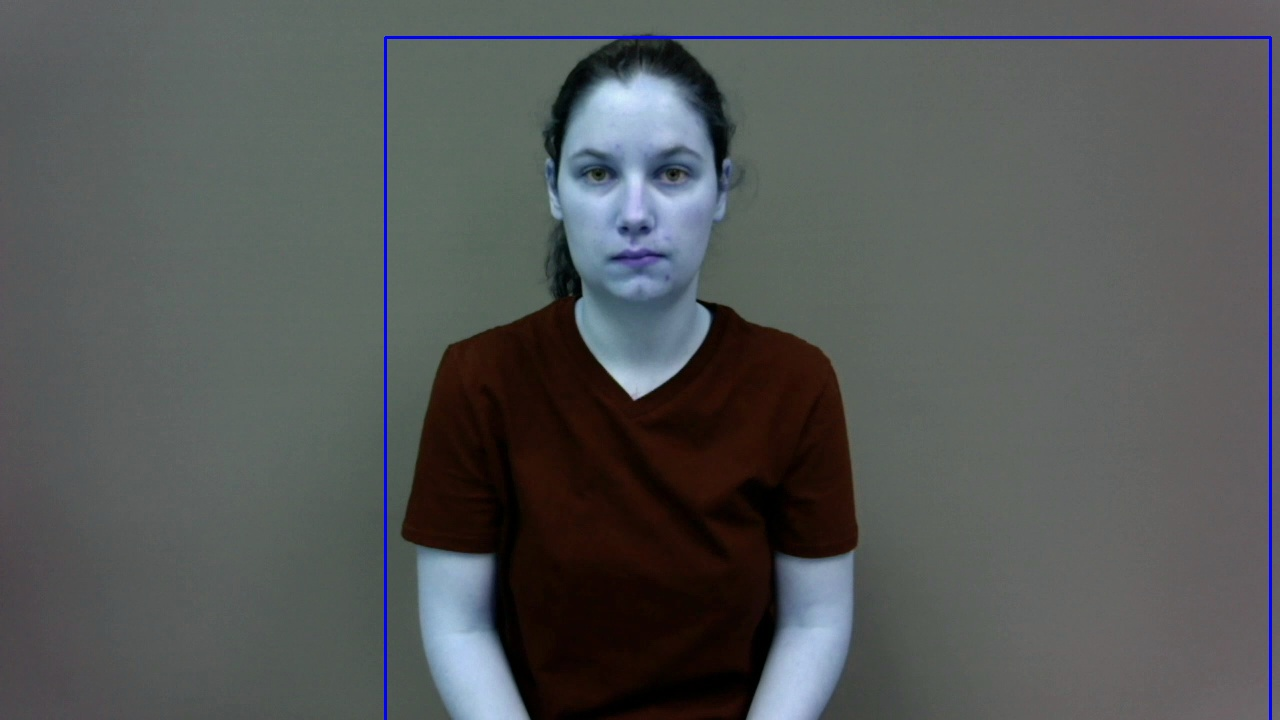

In [12]:
import cv2
from IPython.display import display, clear_output, Image
import time

feature = features.iloc[0]
video_id = feature['video_id']
fps = feature['fps']
# Load video using OpenCV
video_path = f"{videos_path}/{video_id}.mp4"  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

# Set the FPS
cap.set(cv2.CAP_PROP_FPS, fps)

num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# Set the frame end
frame_start = feature['frame_start']
frame_end = feature['frame_end']

if frame_end == -1:
    frame_end = num_frames

# Loop over frames
while frame_start <= frame_end:
    # Read the current frame
    ret, frame = cap.read()

    # Check if the frame was read successfully
    if not ret:
        break

    # Convert BGR frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Get the bounding box coordinates
    bbox = feature['bbox']
    x, y, w, h = bbox

    # Draw the bounding box on the frame
    cv2.rectangle(frame_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Display the frame
    clear_output(wait=True)
    display(Image(data=cv2.imencode('.jpg', frame_rgb)[1].tobytes(), width=560, height=420))

    # Increment the frame start
    frame_start += 1

# Release the video capture
cap.release()


In [13]:
features.to_csv('wlasl_features.csv', index=False)